In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/val.csv')

In [6]:
train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [7]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2542907,1,2016-01-10 16:01:46,1,-74.013916,40.713444,-73.993858,40.752510,N,1249
1,id1709406,1,2016-06-23 18:41:05,1,-74.005440,40.727306,-73.983063,40.734715,N,817
2,id0983698,1,2016-05-14 21:25:34,1,-73.987587,40.749863,-73.986809,40.757549,N,366
3,id3045153,2,2016-05-02 20:09:00,1,-73.973862,40.784153,-73.983025,40.774479,N,195
4,id2383875,1,2016-05-19 10:01:39,1,-73.999916,40.733101,-74.008331,40.734177,N,283


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1000000 non-null  object        
 1   vendor_id              1000000 non-null  int64         
 2   pickup_datetime        1000000 non-null  datetime64[ns]
 3   passenger_count        1000000 non-null  int64         
 4   pickup_longitude       1000000 non-null  float64       
 5   pickup_latitude        1000000 non-null  float64       
 6   dropoff_longitude      1000000 non-null  float64       
 7   dropoff_latitude       1000000 non-null  float64       
 8   store_and_fwd_flag     1000000 non-null  object        
 9   trip_duration          1000000 non-null  int64         
 10  pickup_year            1000000 non-null  int64         
 11  pickup_month           1000000 non-null  int64         
 12  pickup_day             100000

In [30]:
print('Checking for missing data in train:')
print('Missing values found:',train.isna().sum().sum())
print('-'*30)
print('Checking for missing data in test:')
print('Missing values found:',test.isna().sum().sum())

Checking for missing data in train:
Missing values found: 0
------------------------------
Checking for missing data in test:
Missing values found: 0


In [29]:
train.describe(include = 'all')

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_time,season,trip_duration_minutes
count,1000000,1000000.000000,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000,1.000000e+06,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,NaN,962731,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,id2793718,NaN,2016-04-05 18:55:21,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,5,NaN,NaN,NaN,NaN,NaN,994443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2016-01-01 00:00:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-06-30 23:59:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.534793,NaN,1.665353,-73.973475,40.750947,-73.973421,40.751829,NaN,9.548850e+02,2016.0,3.515209,3.051486,13.604165,1.839042,15.914750
std,NaN,0.498788,NaN,1.315723,0.065404,0.033745,0.065432,0.035782,NaN,3.882070e+03,0.0,1.681171,1.954644,6.400685,0.675156,64.701169
min,NaN,1.000000,NaN,0.000000,-121.933342,34.359695,-121.933304,34.359695,NaN,1.000000e+00,2016.0,1.000000,0.000000,0.000000,1.000000,0.016667
25%,NaN,1.000000,NaN,1.000000,-73.991852,40.737372,-73.991341,40.735928,NaN,3.970000e+02,2016.0,2.000000,1.000000,9.000000,1.000000,6.616667


- id column has all unique values for both train and test sets
- vendor_id has only 2 unique values (1 or 2) with a median of 2
- passenger_count has 9 unique values (0,1,2,3,4,5,6,7,8 or 9) with a median of 1
- store_and_fwd_flag has 2 unique values (Y or N)

KeyboardInterrupt: 

# Feature Engineering


#### We have latitudes and longitudes which we cannot use directly in modeling. So I am going to experiment those into clusters.

In [35]:
from sklearn.cluster import KMeans


pickup_coordinates = train[['pickup_latitude','pickup_longitude']]
dropoff_coordinates = train[['dropoff_latitude','dropoff_longitude']]

n_clusters = 5

pickup_kmeans = KMeans(n_clusters=n_clusters,random_state=42)
train['pickup_cluster_label'] = pickup_kmeans.fit_predict(pickup_coordinates)

dropoff_kmeans = KMeans(n_clusters=n_clusters,random_state=42)
train['dropoff_cluster_label'] = dropoff_kmeans.fit_predict(dropoff_coordinates)

## Time

In [15]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [31]:
# Extracting additional info from date
def time(df):
    df['pickup_year'] = df['pickup_datetime'].dt.year
    df['pickup_month'] = df['pickup_datetime'].dt.month
    df['pickup_day'] = df['pickup_datetime'].dt.dayofweek
    df['weekday'] = df['pickup_datetime'].dt.weekday
    df['pickup_time'] = df['pickup_datetime'].dt.hour
    df['trip_duration_minutes'] = df['trip_duration'] / 60
    df['season'] = df['pickup_datetime'].dt.month % 12 // 3 + 1
    return df


train = time(train)
test = time(test)

##### check train and test overlap - to make sure that we are really training on features that are relevant to our test data set

Text(0, 0.5, 'Trips')

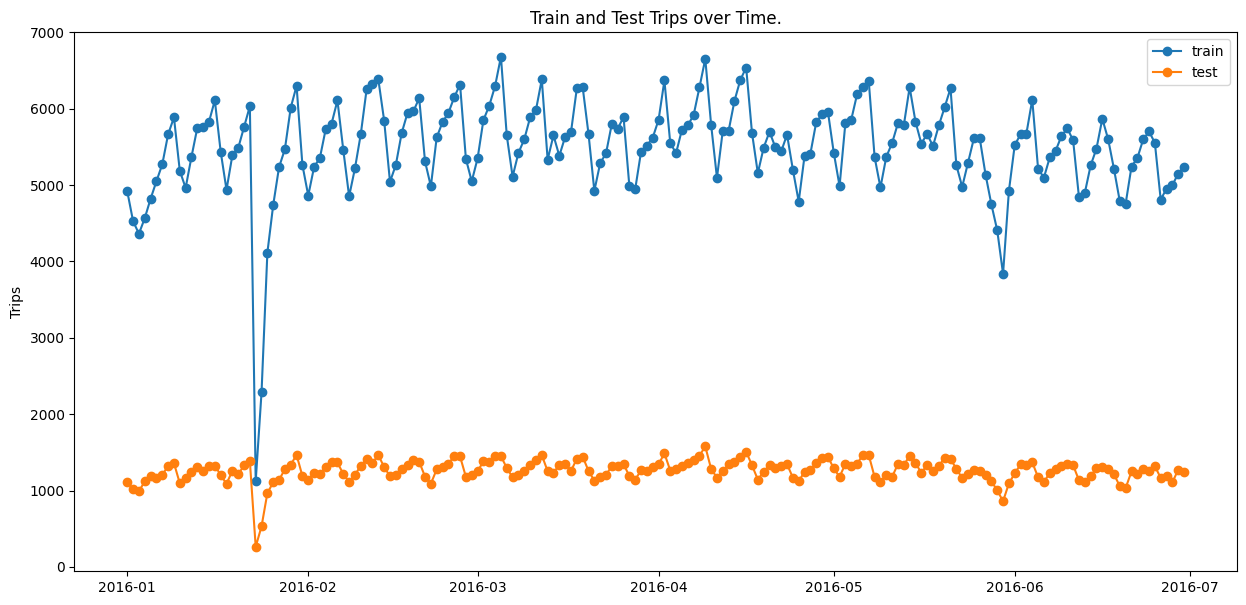

In [32]:
train['pickup_date'] = pd.to_datetime(pd.to_datetime(train['pickup_datetime']).dt.date)
test['pickup_date'] = pd.to_datetime(pd.to_datetime(test['pickup_datetime']).dt.date)

fig,ax1 = plt.subplots(1,1,figsize=(15,7))
plt.plot(train.groupby('pickup_date').count()[['vendor_id']], 'o-', label='train')
plt.plot(test.groupby('pickup_date').count()[['vendor_id']], 'o-', label='test')
ax1.set_title('Train and Test Trips over Time.')
ax1.legend(loc=0)
ax1.set_ylabel('Trips')

## Remove Outliers

In [34]:
max_date = train['trip_duration_minutes'].idxmax()

print(f"Date of Maximum Average Trip Duration in average trip duration: {max_date}")

Date of Maximum Average Trip Duration in average trip duration: 778846
